# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team (Maverick)
##### **Team Member 1 -** Ananddev Singh
##### **Team Member 2 -** Harshit Tiwari
##### **Team Member 3 -** Mukesh Kumar
##### **Team Member 4 -** Mansi Goyal
##### **Team Member 5 -** Annu Morya

# **GitHub Link -**

https://github.com/Singhananddev/ML_unsupervised_learning_-Book-Recommendation-System



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

# **Context**

During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. As a proof of the importance of recommender systems, we can mention that, a few years ago, Netflix organised a challenges (the “Netflix prize”) where the goal was to produce a recommender system that performs better than its own algorithm with a prize of 1 million dollars to win.

By applying this simple dataset and related tasks and notebooks , we will evolutionary go through different paradigms of recommender algorithms . For each of them, we will present how they work, describe their theoretical basis and discuss their strengths and weaknesses.

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import requests

from scipy.sparse import csr_matrix

from sklearn.neighbors import NearestNeighbors

### Dataset Loading

In [6]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load Dataset path

books = pd.read_csv("/content/drive/MyDrive/Capstone Projects/Machine Learning (Regression)/Book Recommendation System/Books.csv")
ratings = pd.read_csv("/content/drive/MyDrive/Capstone Projects/Machine Learning (Regression)/Book Recommendation System/Ratings.csv")
users = pd.read_csv("/content/drive/MyDrive/Capstone Projects/Machine Learning (Regression)/Book Recommendation System/Users.csv")

<ipython-input-7-599198e58def>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/content/drive/MyDrive/Capstone Projects/Machine Learning (Regression)/Book Recommendation System/Books.csv")


### Dataset First View

In [8]:
# Dataset First Look

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# **Content**

The Book-Crossing dataset comprises 3 files.

Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count

print("Shape of books file", books.shape)
print("Shape of ratings file", ratings.shape)
print("Shape of users file", users.shape)

Shape of books file (271360, 8)
Shape of ratings file (1149780, 3)
Shape of users file (278858, 3)


### Dataset Information

In [12]:
# Dataset Info

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count for store and sales dataset

a=len(books[books.duplicated()])
b=len(ratings[ratings.duplicated()])
c=len(users[users.duplicated()])

print("Duplicate values of sales_df =",a)
print("Duplicate values of stores_df =",b)
print("Duplicate values of stores_df =",c)

Duplicate values of sales_df = 0
Duplicate values of stores_df = 0
Duplicate values of stores_df = 0


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [17]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [18]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns

books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [20]:
# drop unused columns

books=books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-S']]

In [21]:
# rename

books.rename(columns={'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'},inplace=True)

<ipython-input-21-c409af8c47b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns={'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'},inplace=True)


In [22]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [23]:
# rename

ratings.rename(columns={'User-ID':'user-id', 'Book-Rating':'ratings'},inplace=True)

In [24]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [25]:
# rename

users.rename(columns={'User-ID':'user-id', 'Location':'location', 'Age':'age'},inplace=True)

# **Data Processing**

In [26]:
# creating a Boolean Series by comparing each unique value

x=ratings['user-id'].value_counts()>200

# extract the indices of the True values in the boolean Series

y=x[x].index

In [27]:
# filter the DataFrame

ratings = ratings[ratings['user-id'].isin(y)]

In [28]:
# merge ratings and books data

ratings_with_books = ratings.merge(books,on='ISBN')

In [29]:
# group by eith respect to title and rating

number_rating = ratings_with_books.groupby('title')['ratings'].count().reset_index()

In [30]:
number_rating.head()

,title,ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [31]:
# rename

number_rating.rename(columns={'ratings':'number of ratings'},inplace=True)

In [32]:
# merge

final_rating = ratings_with_books.merge(number_rating,on='title')

In [33]:
final_rating.head()

,user-id,ISBN,ratings,title,author,year,publisher,Image-URL-S,number of ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [34]:
# DataFrame will be updated to include only the rows related to books with 10 or more ratings

final_rating = final_rating[final_rating['number of ratings']>=10]

common_books = final_rating[~final_rating["title"].isin(final_rating)]

In [35]:
final_rating.head()

,user-id,ISBN,ratings,title,author,year,publisher,Image-URL-S,number of ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [36]:
final_rating.shape

(197485, 9)

In [37]:
# drop duplicate values

final_rating.drop_duplicates(['user-id','title'],inplace=True)

In [38]:
final_rating.shape

(193756, 9)

# **Weighted Rating-Based Recommendation System**

In [39]:
avg_ratings = final_rating.groupby('title')['ratings'].mean().reset_index().rename(columns={'ratings': 'avg_rating'})

avg = pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

In [40]:
cnt_ratings = final_rating.groupby('title')['ratings'].count().reset_index().rename(columns={'ratings': 'count_rating'})

cnt = pd.DataFrame(cnt_ratings).sort_values('count_rating',ascending=False)

In [41]:
popularite = avg.merge(cnt,on='title')

In [42]:
v = popularite["count_rating"]
R = popularite["avg_rating"]
m = v.quantile(0.90)
c = R.mean()
popularite['w_score']=((v*R) + (m*c)) / (v+m)

In [43]:
pop_sort = popularite.sort_values('w_score',ascending=False)

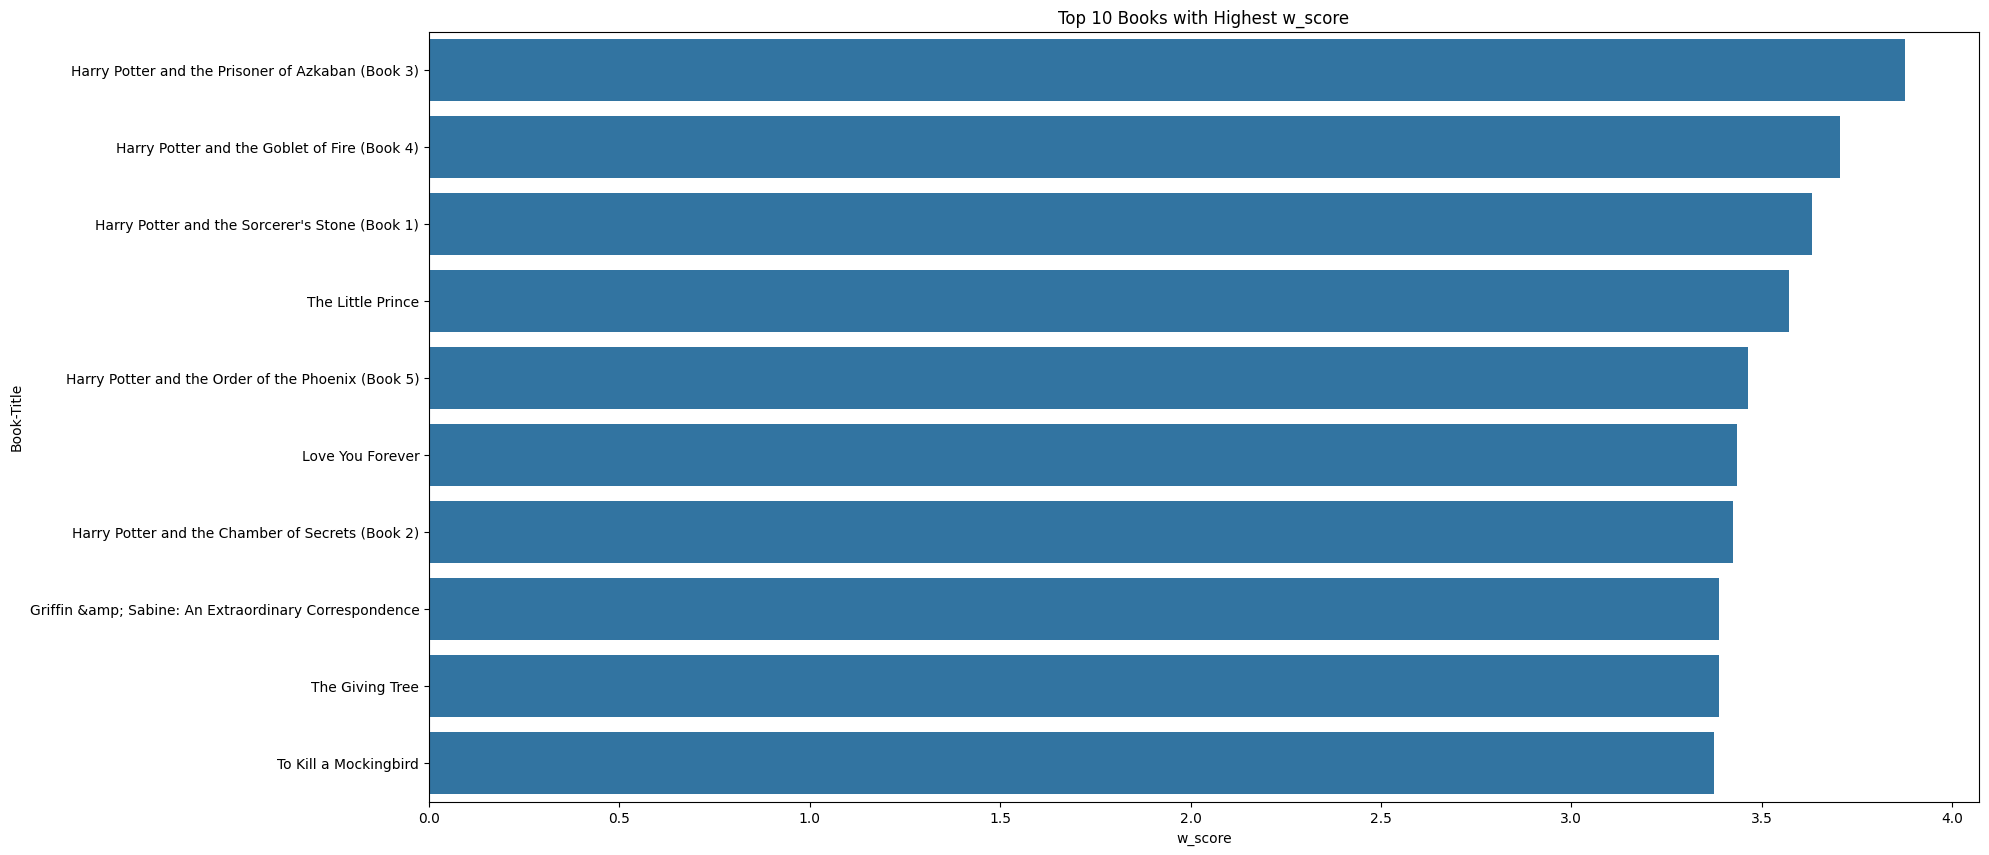

In [44]:
top_10_books = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='title', data=top_10_books)
plt.xlabel('w_score')
plt.ylabel('Book-Title')
plt.title('Top 10 Books with Highest w_score')
plt.show()

# **Collaborative filtering recommendation system**

In [45]:
# creating pivot table

rating_pivot = final_rating.pivot_table(columns='user-id',index='title',values='ratings')
rating_pivot.fillna(0,inplace=True)

In [46]:
rating_pivot.head()

user-id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001 Ways to Be Romantic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# CSR is a commonly used sparse matrix format, which is efficient for storing and performing operations on matrices with a large number of zero elements.

book_sparse = csr_matrix(rating_pivot)

In [48]:
users_items_pivot_matrix = rating_pivot.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
users_ids = list(rating_pivot.index)
users_ids[:10]

[' Q-Space (Star Trek The Next Generation, Book 47)',
 "'Salem's Lot",
 '01-01-00: The Novel of the Millennium',
 '10 Lb. Penalty',
 '1001 Ways to Be Romantic',
 '101 Dalmatians',
 '14,000 Things to Be Happy About',
 '16 Lighthouse Road',
 '18Mm Blues',
 '1916: A Novel of the Irish Rebellion (Irish Century)']

# **Collaborative filtering : NearestNeighbors model for recommendation system**

Collaborative filtering is undoubtedly a popular technique for creating recommendation systems based on user preferences and actions. I can give you a more thorough breakdown of how collaborative filtering functions and how to use it.

Collaborative filtering techniques leverage patterns and connections between users and products (in your instance, books) to generate recommendations. The two primary forms of collaborative filtering are.

# Content - Based Collaborative Filtering

This method finds people who share the target user's preferences and then suggests products that those users liked. It is assumed that if users A and B have shared historical preferences, then what one of them likes, the other may as well.


In [50]:
# model creation

model=NearestNeighbors(algorithm='brute')

In [51]:
# fit the model

model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [52]:
distances,suggestions=model.kneighbors(rating_pivot.iloc[10,:].values.reshape(1,-1),n_neighbors=6)

In [53]:
distances
for i in range(len(suggestions)):
    print(rating_pivot.index[suggestions[i]])

Index(['1984', 'Far from the Madding Crowd',
       'The Sound and the Fury (Vintage International)',
       'Seven Years in Tibet', 'The Memory of Earth (Homecoming (Paperback))',
       'Vinegar Hill (Oprah's Book Club (Hardcover))'],
      dtype='object', name='title')


In [54]:
def recommended_book(book_name):
    book_id=np.where(rating_pivot.index==book_name)[0][0]
    distances,suggestions=model.kneighbors(rating_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
    for i in range(len(suggestions)):
        #if i==0:
        print('The suggestions ',book_name,' are :')

        print(rating_pivot.index[suggestions[i]])

In [55]:
recommended_book('Animal Farm')

The suggestions  Animal Farm  are :
Index(['Animal Farm', 'Shoeless Joe', 'Miss Smilla's Feeling for Snow',
       'Growing Pains of Adrian Mole', 'The Republic of Love', 'No Comebacks'],
      dtype='object', name='title')


In [56]:
recommended_book('84 Charing Cross Road')

The suggestions  84 Charing Cross Road  are :
Index(['84 Charing Cross Road', 'An Equal Music', 'Taking the Fifth',
       'Miss Smilla's Feeling for Snow', 'This Boy's Life: A Memoir',
       'Blood Will Tell'],
      dtype='object', name='title')


In this notebook study, we used user ID and item based recommendation systems to choose books for a randomly chosen user from a vast collection of books. On an individual basis, we identified users who had behaviors comparable to our users and suggested their preferred books to our users. We recommended the six novels that most closely matched the rating system of the book our user had read based on the items.